In [14]:
# import library
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, concatenate, GlobalAveragePooling2D, Dropout,BatchNormalization
from keras.losses import CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical
!pip install np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import keras
import keras.utils
from keras import utils as np_utils
from keras.layers import Dense, Activation, Flatten

In [15]:
# load CIFAR-10 dataset and check the shape
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
num = 10
print(x_train.shape)
print(x_test.shape)
print(f'  Train _Shape:{x_train.shape}    lb:{y_train.shape}')
print(f'  Test_Shape:{x_test.shape}    lb:{y_test.shape}')

(50000, 32, 32, 3)
(10000, 32, 32, 3)
  Train _Shape:(50000, 32, 32, 3)    lb:(50000, 1)
  Test_Shape:(10000, 32, 32, 3)    lb:(10000, 1)


In [16]:
# normalization image pixel 0 -1 and convert lable to onehot coding
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
# implement inception module
def inception_module(x):
  # 1*1
    Conv11 = Conv2D(64, (1,1), padding='same', activation='relu')(x)
    # 1*1 -->3*3 Conv
    Conv33 = Conv2D(32, (1,1), padding='same', activation='relu')(x)

    Conv33 = Conv2D(64, (3,3), padding='same', activation='relu')(Conv33)
    # 1*1 --> 5*5 Conv
    Conv55 = Conv2D(32, (1,1), padding='same', activation='relu')(x)
    Conv55 = Conv2D(64, (5,5), padding='same', activation='relu')(Conv55)
    # 3*3 MaxPool--> 1*1 Conv
    MaxPool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    MaxPool = Conv2D(64, (1,1), padding='same', activation='relu')(MaxPool)
      # Concatenate all layer
    output_inception = concatenate([Conv11, Conv33, Conv55, MaxPool], axis=3)

    return output_inception

In [20]:
# define architecture our net custom
input_layer = Input(shape=(32, 32, 3))
# This code creates a convolutional layer that applies 32 filters of size 3x3 to the input layer. The padding parameter is set to 'same', which means that the output layer will have the same spatial dimensions as the input layer. The activation parameter is set to 'relu', which means that the rectified linear unit function will be applied to the output of the convolution.
layer = Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)
# This code creates a convolutional layer that applies 32 filters of size 3x3 to the input layer. The padding parameter is set to 'same', which means that the output layer will have the same spatial dimensions as the input layer. The activation parameter is set to 'relu', which means that the rectified linear unit function will be applied to the output of the convolution.
layer = Conv2D(64, (3,3), padding='same', activation='relu')(layer)
layer = Conv2D(32, (3,3), padding='same', activation='relu')(layer)
# This code performs the following operations on the layer:

# •  First, it applies a max pooling layer that reduces the spatial dimensions of the layer by half. The pool_size parameter is set to (2, 2), which means that the layer will be divided into 2x2 non-overlapping regions, and the maximum value in each region will be selected as the output. This can help to reduce the number of parameters and the computational cost of the model, as well as to enhance the translation invariance of the features.

# •  Second, it applies an inception module that combines multiple convolutional filters of different sizes and a max pooling layer on the layer. The inception module is a network structure that can increase the efficiency and performance of the model by allowing it to learn features at multiple scales and levels of abstraction. The inception module consists of four parallel branches: a 1x1 convolution, a 1x1 convolution followed by a 3x3 convolution, a 1x1 convolution followed by a 5x5 convolution, and a 3x3 max pooling followed by a 1x1 convolution. The outputs of these branches are then concatenated along the channel dimension to form the output of the inception module.

# •  Third, it applies another convolutional layer that applies 128 filters of size 3x3 to the output of the inception module. The padding parameter is set to 'same', which means that the output layer will have the same spatial dimensions as the input layer. The activation parameter is set to 'relu', which means that the rectified linear unit function will be applied to the output of the convolution. This layer can further extract more features from the inception module output.
layer= MaxPooling2D(pool_size=(2, 2))(layer)
layer= inception_module(layer)
layer = Conv2D(128, (3,3), padding='same', activation='relu')(layer)
  # Batch Normalization
layer = BatchNormalization()(layer)
 #Dropout with 0.5 %
layer = Dropout(0.5)(layer)
layer = Conv2D(256, (3,3), padding='same', activation='relu')(layer)
  # Batch Normalization
layer = BatchNormalization()(layer)
  #Dropout with 0.5 %
layer = Dropout(0.5)(layer)
# make flat


# •  First, it applies a flatten layer that reshapes the layer into a one-dimensional vector. The flatten layer is used to convert the multidimensional feature maps into a single vector that can be fed into a fully connected layer. The flatten layer does not change the number of elements in the layer, but only changes their shape.

# •  Second, it applies a dense layer that creates a fully connected layer with 10 units and a softmax activation function. The dense layer is a type of layer that performs a linear transformation on the input vector, followed by an activation function. The dense layer can learn the weights and biases that map the input vector to the output vector. The softmax activation function is a type of function that normalizes the output vector into a probability distribution over the 10 classes. The softmax function ensures that the sum of the output values is 1, and that each value is between 0 and 1. The softmax function can help the model to output the most likely class for each input image.
layer = Flatten()(layer)
output_layer = Dense(10, activation='softmax')(layer)
# creat model
model = Model(inputs=input_layer, outputs=output_layer)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_21 (Conv2D)          (None, 32, 32, 32)           896       ['input_3[0][0]']             
                                                                                                  
 conv2d_22 (Conv2D)          (None, 32, 32, 64)           18496     ['conv2d_21[0][0]']           
                                                                                                  
 conv2d_23 (Conv2D)          (None, 32, 32, 32)           18464     ['conv2d_22[0][0]']           
                                                                                            

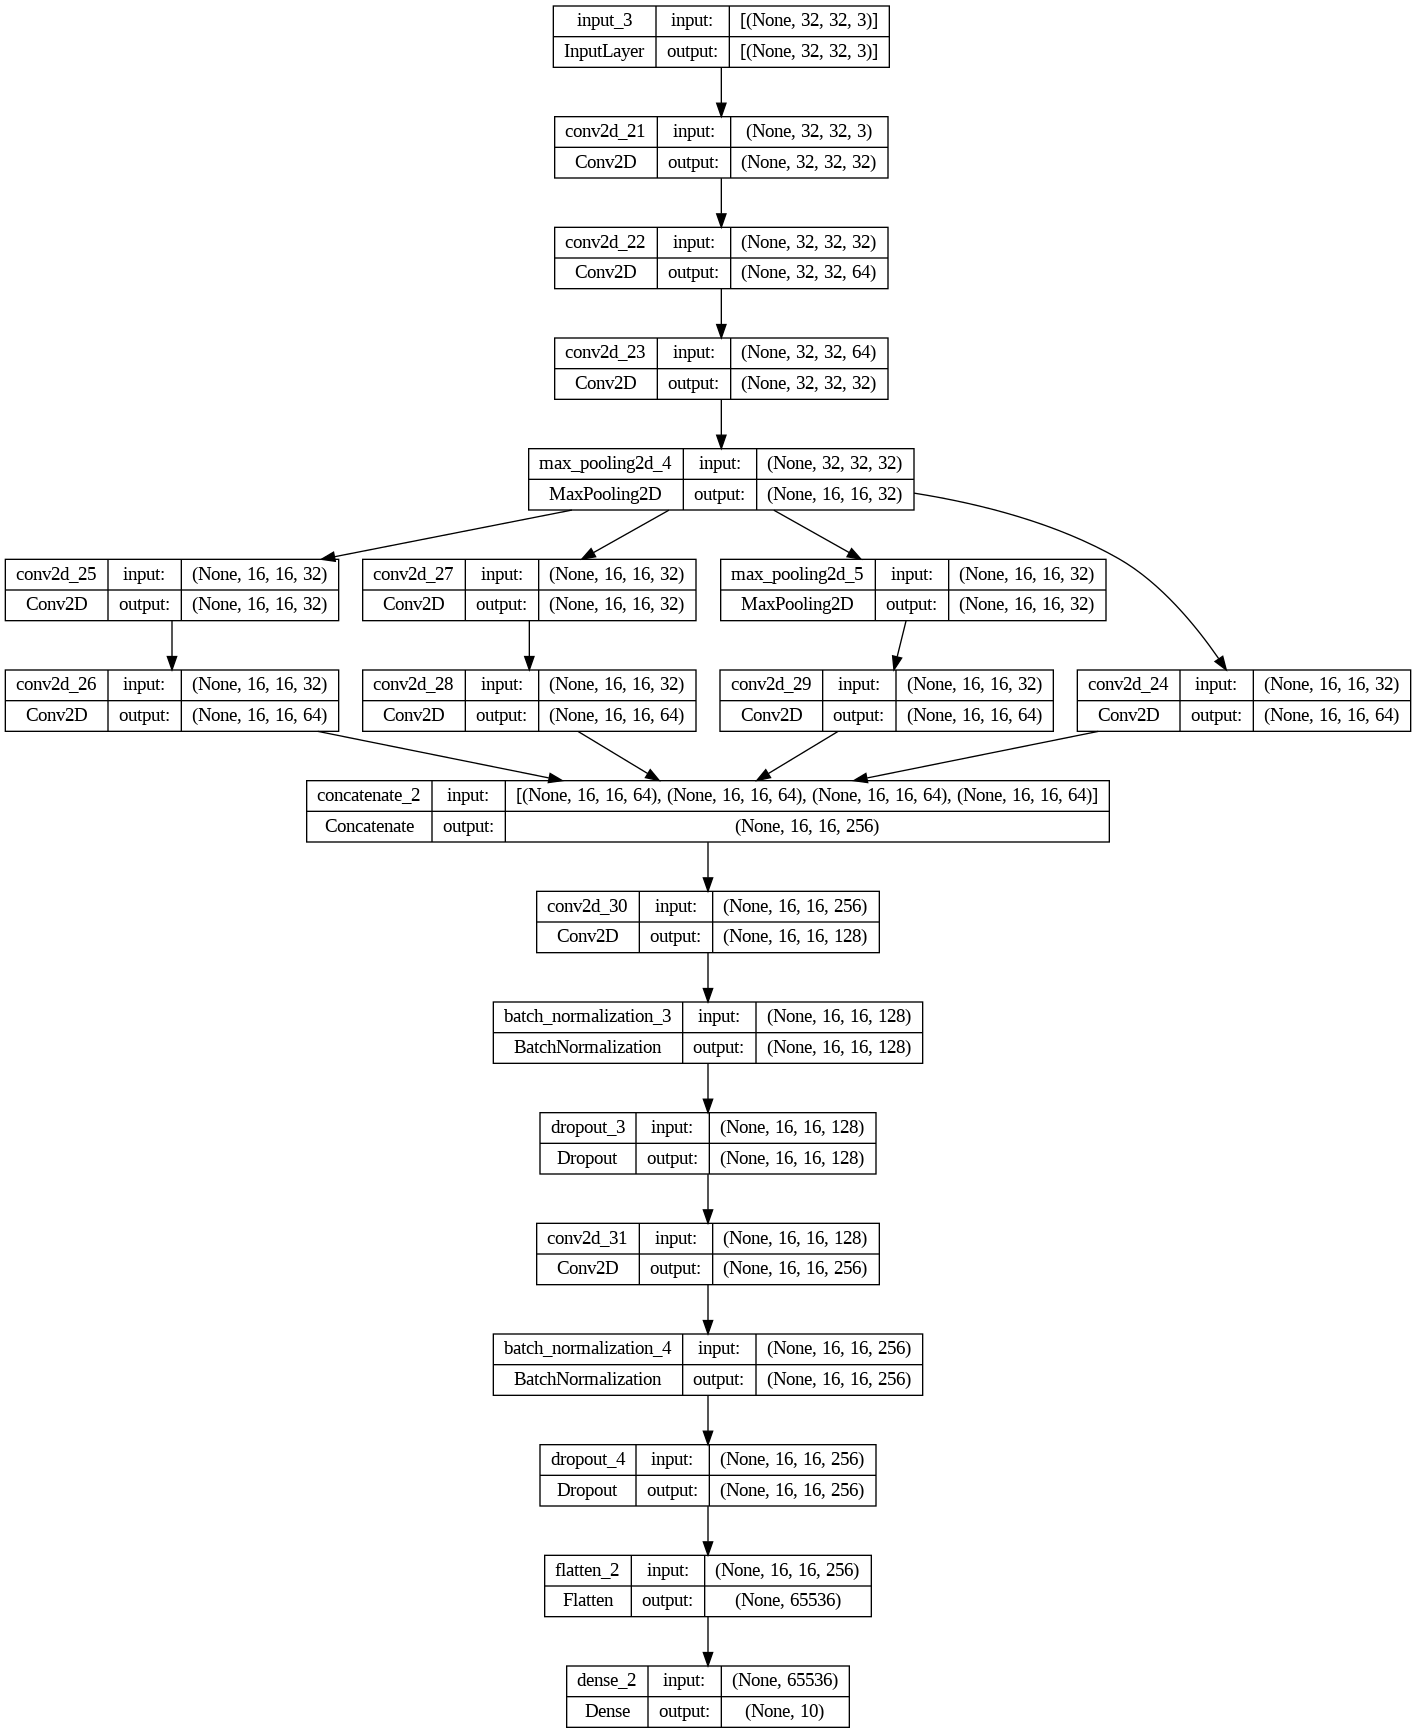

In [21]:
import tensorflow as tf
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
# compile and then fit model to train 5 epoch
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test))

In [25]:
# test model
model.evaluate(x_test, y_test)

313/313 [==============================] - 77s 246ms/step - loss: 1.3226 - accuracy: 0.5036


[1.322568416595459, 0.503600001335144]

In [ ]:
# plot training and test loss
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy' , color ='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy' , color ='black')
plt.title('ACCURACY FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color ='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color ='black')
plt.title('LOSS FOR MODEL TRAIN AND VALIDATION')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot training and test accuracy
